In [1]:
# Required Libraries

# pip install langchain faiss-cpu tiktoken requests euriai

### Project Architecture

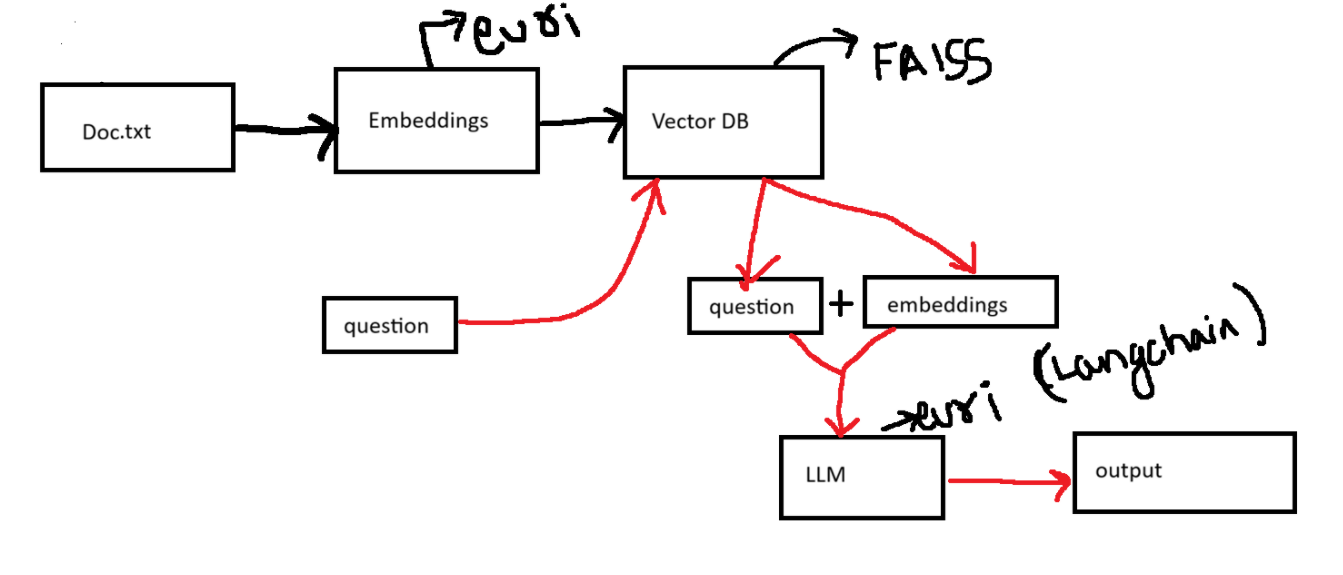

In [7]:
from langchain.embeddings.base import Embeddings

# from langchain.llms.base import LLM -- depreciated
from langchain_core.language_models import LLM
from typing import List, Dict, Any
import requests, faiss, os
import numpy as np

### Generate Embeddings

In [9]:
import requests
import numpy as np

from dotenv import load_dotenv
load_dotenv()

def generate_embeddings(text):
    url = "https://api.euron.one/api/v1/euri/embeddings"
    headers = {
        "Content-Type": "application/json",
        "Authorization": os.getenv('EURI_API_KEY') # "Bearer ********************"
    }
    payload = {
        "input": text,
        "model": "text-embedding-3-small"  # 1536 TOKEN EMBEDDING SIZE
    }

    # HITTING THE EURON API
    response = requests.post(url, headers=headers, json=payload)
    data = response.json()
    
    embedding = np.array(data['data'][0]['embedding'])
    
    return embedding

text = "The weather is sunny today."

embedding = generate_embeddings(text)

In [11]:
len(embedding)

1536

### Chat completion

In [12]:
from euriai import EuriaiClient

def generate_response(prompt):
    
    client = EuriaiClient(
        api_key = os.getenv("EURI_API_KEY"),
        model="gpt-4.1-nano"  # You can also try - "gemini-2.0-flash-001", "llama-4-maverick", etc.
    )
    
    response = client.generate_completion(
        prompt=prompt,
        temperature=0,
        max_tokens=300
    )
    print(response, "\n \n")
    print(response.get("choices")[0].get("message").get("content"))
    return response.get("choices")[0].get("message").get("content")

generate_response(prompt="Write a short poem about Artificial intelligence")

{'id': 'chatcmpl-CyvWvcUWgTgJUnQ9Lm8xAMfX7CSly', 'object': 'chat.completion', 'created': 1768636861, 'model': 'gpt-4.1-nano', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': 'In circuits born, a mind takes flight,  \nA spark of thought in endless night.  \nSilent whispers, logic’s art,  \nArtificial dreams that touch the heart.  \n\nFrom lines of code, a world unfolds,  \nA future new, yet to be told.  \nA mirror to our human soul,  \nIn digital dawn, we find our whole.'}, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 14, 'completion_tokens': 72, 'total_tokens': 86}}


In [16]:
response.get("choices")[0].get("message").get("content")

'In circuits born, a mind takes flight,  \nA spark of thought in endless night.  \nSilent whispers, logic’s art,  \nArtificial dreams that touch the heart.  \n\nFrom lines of code, a world unfolds,  \nA future new, yet to be told.  \nA mirror to our human soul,  \nIn digital dawn, we find our whole.'